# Assignment 2

In this assignment we'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

<IPython.core.display.Javascript object>


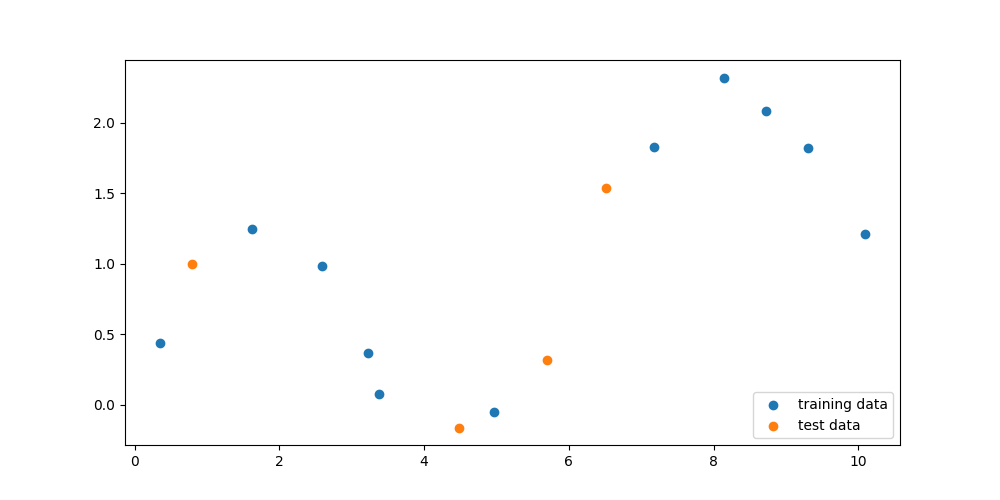

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# first we generate random data
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

# and we split it into test and train data
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def intro():
    # let's display them
    %matplotlib notebook

    plt.figure(figsize=(10, 5))
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

intro()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="assets/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

In [2]:
# let's bring in the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# now we reshape our train and test data since we have only one feature
X_train_rs = X_train.reshape(-1, 1)
X_test_rs = X_test.reshape(-1,1)

# First-degree Linear Regression
linreg = LinearRegression().fit(X_train_rs, y_train)

m, b = linreg.coef_, linreg.intercept_
print('linear model coeff (w): {}'
     .format(m))
print('linear model intercept (b): {:.3f}'
     .format(b))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_rs, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_rs, y_test)))

linear model coeff (w): [0.15999738]
linear model intercept (b): 0.253
R-squared score (training): 0.429
R-squared score (test): -0.452


<IPython.core.display.Javascript object>


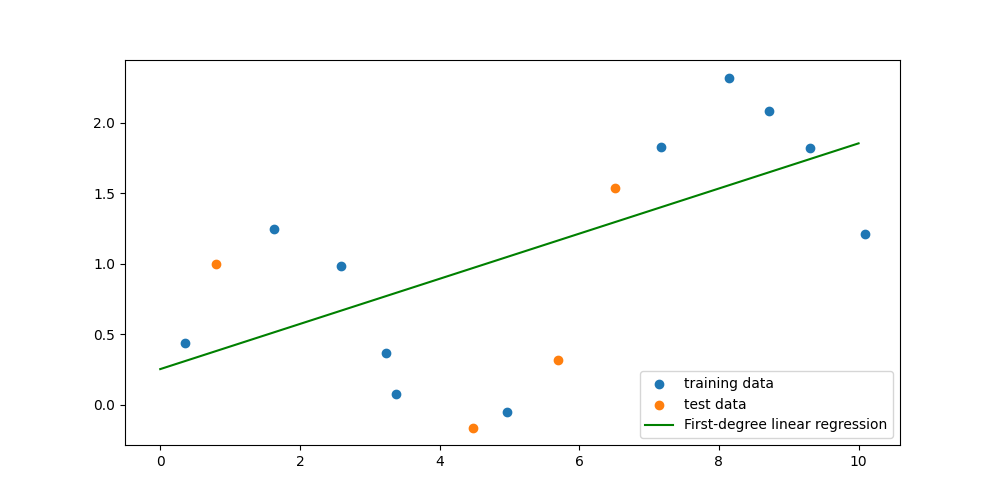

In [3]:
# let's plot it
def Degree_1():
    %matplotlib notebook
    n = 100
    x_reg = np.linspace(0,10,n)
    y_reg = m * x_reg + b
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.plot(x_reg, y_reg, label='First-degree linear regression', color='green')
    plt.legend(loc=4)
    
Degree_1()

In [4]:
# Third-degree linear regression
# to handle this we need to transform data
poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x.reshape(-1,1))

X_train3, X_test3, y_train3, y_test3 = train_test_split(x_poly3, y,
                                                   random_state = 0)
linreg3 = LinearRegression().fit(X_train3, y_train3)
coeff3, b3 = linreg3.coef_, linreg3.intercept_

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(coeff3))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(b3))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg3.score(X_train3, y_train3)))
print('(poly deg 3) R-squared score (test): {:.3f}\n'
     .format(linreg3.score(X_test3, y_test3)))

(poly deg 3) linear model coeff (w):
[ 0.         -0.79802899  0.2120088  -0.01285893]
(poly deg 3) linear model intercept (b): 1.230
(poly deg 3) R-squared score (training): 0.587
(poly deg 3) R-squared score (test): 0.005



<IPython.core.display.Javascript object>


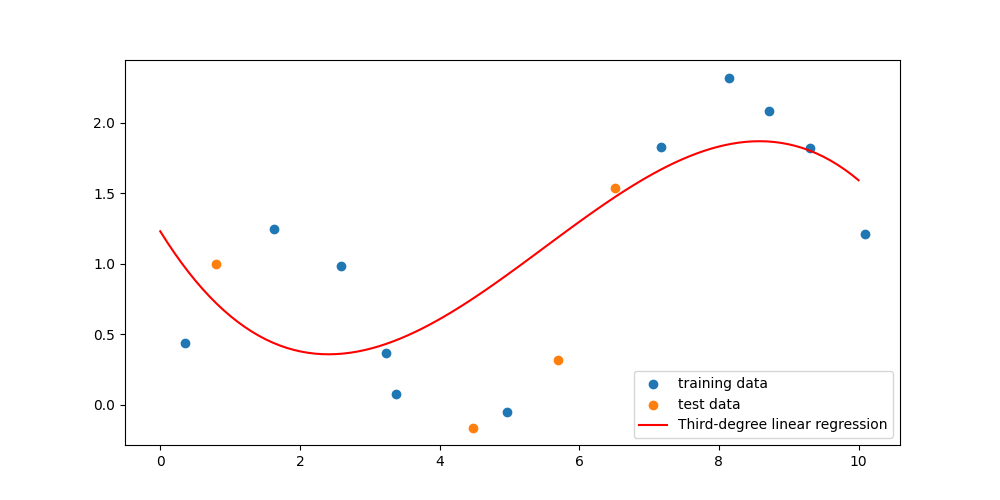

In [5]:
def Degree_3():
    %matplotlib notebook
    n = 100
    x_reg3 = np.linspace(0,10,n)
    y_reg3 = b3
    k = 0
    for z in coeff3:
        y_reg3 += z * x_reg3**k
        k += 1
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.plot(x_reg3, y_reg3, label='Third-degree linear regression', color='red')
    plt.legend(loc=4)
    
Degree_3()

In [6]:
# Sixth-degree linear regression
poly6 = PolynomialFeatures(degree=6)
x_poly6 = poly6.fit_transform(x.reshape(-1,1))

X_train6, X_test6, y_train6, y_test6 = train_test_split(x_poly6, y,
                                                   random_state = 0)
linreg6 = LinearRegression().fit(X_train6, y_train6)
coeff6, b6 = linreg6.coef_, linreg6.intercept_

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(coeff6))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(b6))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg6.score(X_train6, y_train6)))
print('(poly deg 3) R-squared score (test): {:.3f}\n'
     .format(linreg6.score(X_test6, y_test6)))

(poly deg 3) linear model coeff (w):
[ 0.00000000e+00  1.99160182e+00 -5.28148359e-01 -1.83316577e-01
  7.90001503e-02 -9.05559396e-03  3.33228328e-04]
(poly deg 3) linear model intercept (b): -0.200
(poly deg 3) R-squared score (training): 0.990
(poly deg 3) R-squared score (test): 0.921



<IPython.core.display.Javascript object>


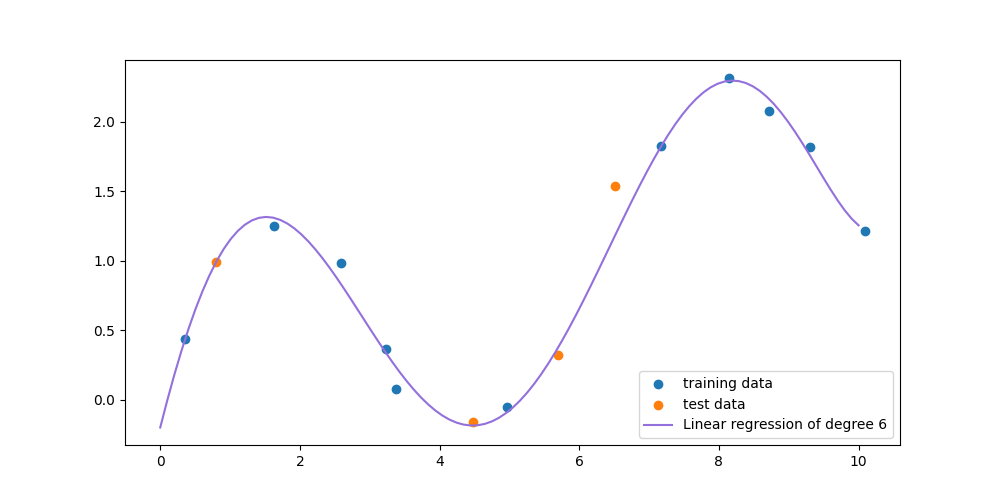

In [7]:
def Degree_6():
    %matplotlib notebook
    n = 100
    x_reg6 = np.linspace(0,10,n)
    y_reg6 = b6
    k = 0
    for z in coeff6:
        y_reg6 += z * x_reg6**k
        k += 1
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.plot(x_reg6, y_reg6, label='Linear regression of degree 6', color='mediumpurple')
    plt.legend(loc=4)
    
Degree_6()

In [8]:
# Nineth-degree linear regression
poly9 = PolynomialFeatures(degree=9)
x_poly9 = poly9.fit_transform(x.reshape(-1,1))

X_train9, X_test9, y_train9, y_test9 = train_test_split(x_poly9, y,
                                                   random_state = 0)
linreg9 = LinearRegression().fit(X_train9, y_train9)
coeff9, b9 = linreg9.coef_, linreg9.intercept_

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(coeff9))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(b9))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg9.score(X_train9, y_train9)))
print('(poly deg 3) R-squared score (test): {:.3f}\n'
     .format(linreg9.score(X_test9, y_test9)))

(poly deg 3) linear model coeff (w):
[ 0.00000000e+00 -3.04674596e+01  4.46738479e+01 -3.03485341e+01
  1.14619031e+01 -2.61504500e+00  3.69697885e-01 -3.16768857e-02
  1.50593574e-03 -3.04566933e-05]
(poly deg 3) linear model intercept (b): 6.795
(poly deg 3) R-squared score (training): 0.998
(poly deg 3) R-squared score (test): -0.645



<IPython.core.display.Javascript object>


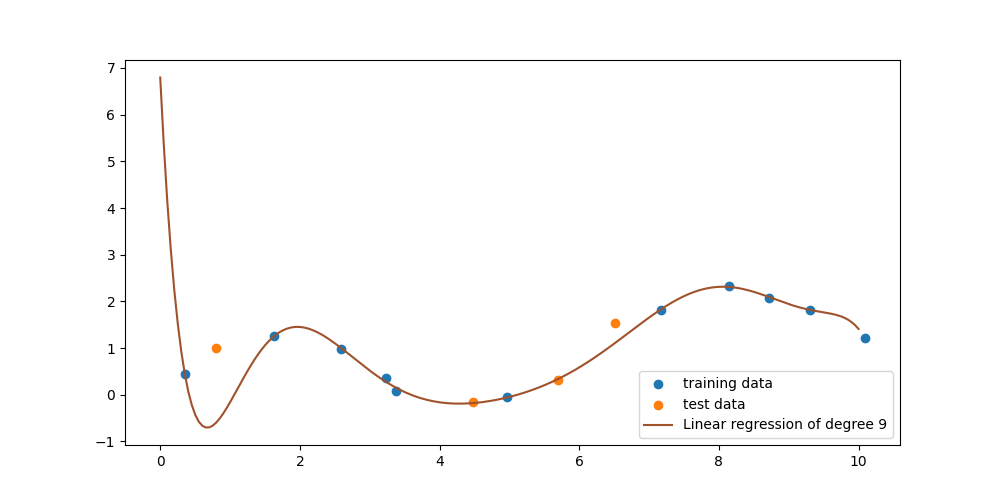

In [9]:
def Degree_9():
    %matplotlib notebook
    n = 200
    x_reg9 = np.linspace(0,10,n)
    y_reg9 = b9
    k = 0
    for z in coeff9:
        y_reg9 += z * x_reg9**k
        k += 1
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.plot(x_reg9, y_reg9, label='Linear regression of degree 9', color='sienna')
    plt.legend(loc=4)
    
Degree_9()

<IPython.core.display.Javascript object>


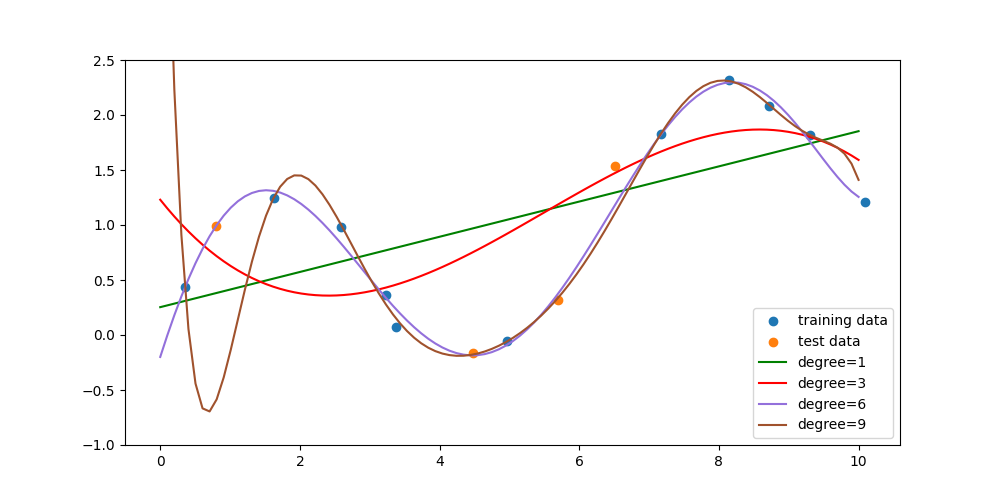

In [10]:
# and all together
def all_together():
    %matplotlib notebook
    n = 100
    
    x_reg = np.linspace(0,10,n)
    y_reg = m * x_reg + b
    y_r = [b3, b6, b9]
    coeff = [coeff3, coeff6, coeff9]
    color = ['red', 'mediumpurple', 'sienna']
    
    for ii, c in enumerate(coeff):
        k = 0
        for z in c:
            y_r[ii] += z * x_reg**k
            k += 1
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    
    plt.plot(x_reg, y_reg, label='degree=1', color='green')
    for ii, co in enumerate(color):
        plt.plot(x_reg, y_r[ii], label='degree={}'.format(3+ii*3), color=co)
    plt.ylim(-1, 2.5)
    plt.legend(loc=4)
    
all_together()

In [11]:
# the next step is predicting values over the interval x=0 to 10
degree_predictions = np.zeros((4,100))
degrees = [3,6,9]
x_in = [np.linspace(0,10,100).reshape(-1,1)]

for d in degrees:
    pol = PolynomialFeatures(degree=d)
    x_in.append(pol.fit_transform(x_in[0]))

linr = [linreg, linreg3, linreg6, linreg9]
for ii, l in enumerate(linr):
    degree_predictions[ii] = l.predict(x_in[ii])
degree_predictions.shape

(4, 100)

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

In [12]:
# first we generate random data
from sklearn.metrics import r2_score
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

In [13]:
K = np.arange(10)
r2_train, r2_test = [], []

for k in K:
    pol = PolynomialFeatures(degree=k)
    x_pol = pol.fit_transform(x.reshape(-1,1))

    X_train, X_test, y_train, y_test = train_test_split(x_pol, y,
                                                       random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)
    
    r2_train.append(r2_score(y_train, linreg.predict(X_train)))
    r2_test.append(r2_score(y_test, linreg.predict(X_test)))

r2_train = np.array(r2_train)
r2_test = np.array(r2_test)

R2 = (r2_train, r2_test)
R2

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247944, -0.64525447]))

### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

<IPython.core.display.Javascript object>


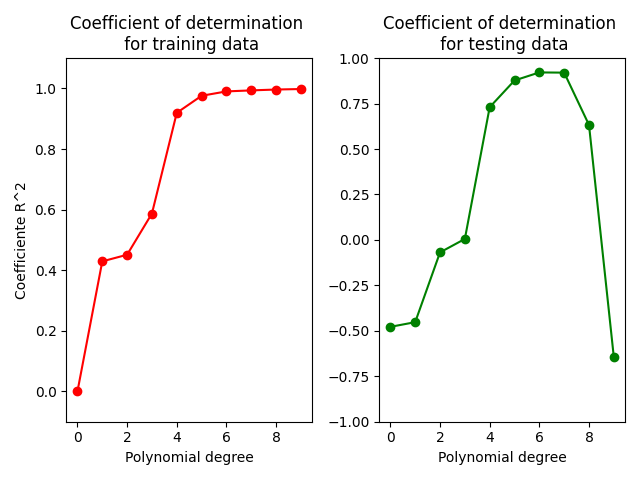

In [56]:
# fisrt let's plot R2 vs polynomial degree
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(K, R2[0], 'o-', color = 'red')
ax2.plot(K, R2[1], 'o-', color = 'green')
ax1.set_title('Coefficient of determination \n for training data')
ax2.set_title('Coefficient of determination \n for testing data')
ax1.set_xlabel('Polynomial degree')
ax1.set_ylabel('Coefficiente R^2')
ax2.set_xlabel('Polynomial degree')
ax1.set_ylim(-0.1,1.1)
ax2.set_ylim(-1,1)

fig.tight_layout()
plt.show()

 So we can appreciate that polynomial degrees larger than 3 generate overfitting models, values as 0 and maybe 1 and 2 could be examples of underfitting models, and a value as 3 would be a good candidate for good generalization performance on this dataset

### Question 4

Training models on high degree polynomial features can result in overfitting. Train two models: a non-regularized LinearRegression model and a Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`, `tol=0.1`) on polynomial features of degree 12. Return the $R^2$ score for LinearRegression and Lasso model's test sets.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import r2_score

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

In [16]:
# non-regularized LinearRegression of degree 12
poly12 = PolynomialFeatures(degree=12)
x_poly12 = poly12.fit_transform(x.reshape(-1,1))

X_train12, X_test12, y_train12, y_test12 = train_test_split(x_poly12, y,
                                                   random_state = 0)

linreg12 = LinearRegression().fit(X_train12, y_train12)
R2_12 = r2_score(y_test12, linreg12.predict(X_test12))
R2_12

-4.311990451794237

In [17]:
# Lasso Regression
linlasso = Lasso(alpha=0.01, max_iter = 10000, tol=0.1).fit(X_train12, y_train12)
R2_lasso = r2_score(y_test12, linlasso.predict(X_test12))
R2_lasso

0.6051396919570029

## Part 2 - Classification

For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to trian a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv('assets/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

### Question 5

Using `X_train` and `y_train` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

In [37]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

dtc = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train2, y_train2)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_test2, y_test2)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [38]:
# Setting max decision three depth to help avoid overfitting
dtc_3 = DecisionTreeClassifier(max_depth = 3).fit(X_train2, y_train2)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc_3.score(X_train2, y_train2)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc_3.score(X_test2, y_test2)))

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.98


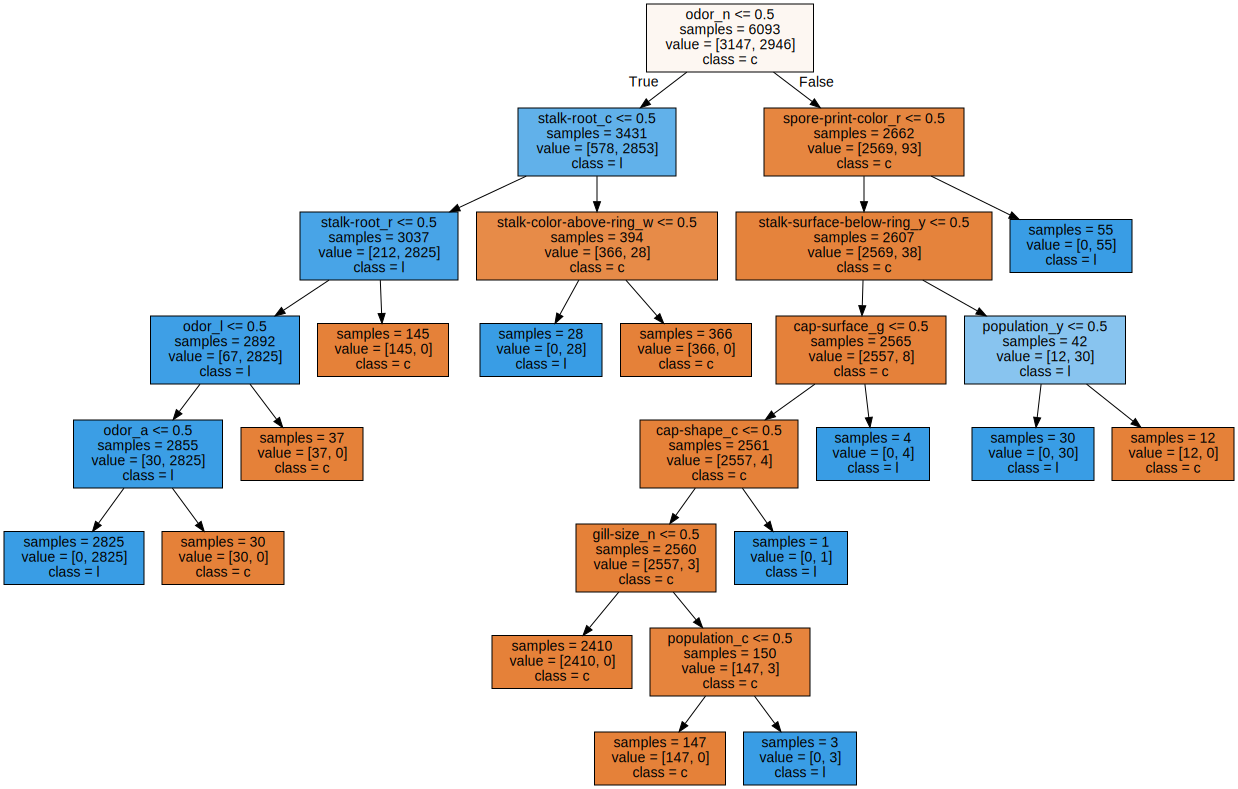

In [39]:
# Visualizing decision trees
x_features = mush_df2.columns[2:]
y_target = mush_df2.columns[1]
plot_decision_tree(dtc, x_features, y_target)

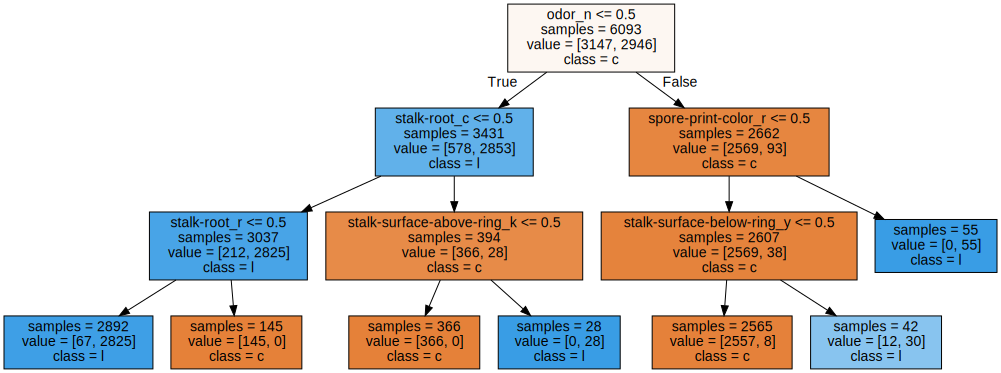

In [40]:
# Pre-pruned version (max_depth = 3)
x_features = mush_df2.columns[2:]
y_target = mush_df2.columns[1]
plot_decision_tree(dtc_3, x_features, y_target)

In [41]:
# now let's find the feature importance
# from adspy_shared_utilities import plot_feature_importances

# plt.figure(figsize=(10,40), dpi=80)
# plot_feature_importances(dtc, x_features)
# plt.show()

f_imp = dtc.feature_importances_
importance_5 = f_imp.argsort()[::-1][:5]
X_mush.columns[importance_5]

Index(['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r',
       'odor_l'],
      dtype='object')

### Question 6

For this question, use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.

Create an `SVC` with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  Explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`).

For each level of `gamma`, `validation_curve` will use 3-fold cross validation (use `cv=3, n_jobs=2` as parameters for `validation_curve`), returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets in each fold.

Find the mean score across the five models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-4,1,6)

this_C = 1
this_kernel = 'rbf'
svc = SVC(kernel = this_kernel, C=this_C, random_state=0)
train_scores, test_scores = validation_curve(svc, X_mush.values, y_mush.values,
                                            param_name='gamma',
                                            param_range=param_range, cv=3, n_jobs=2)

In [60]:
train_scores

array([[0.93149926, 0.91174298, 0.85192024],
       [0.97913589, 0.97895126, 0.98504431],
       [0.99796898, 0.99889217, 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ]])

In [61]:
test_scores

array([[0.82717873, 0.87370753, 0.96159527],
       [0.83493353, 0.87370753, 0.77991137],
       [0.8478582 , 0.96085672, 0.71639586],
       [0.90546529, 0.99002954, 0.70199409],
       [0.86779911, 0.94202363, 0.69867061],
       [0.51772526, 0.51809453, 0.51809453]])

In [62]:
trs = train_scores.mean(axis=1)
trs

array([0.89838749, 0.98104382, 0.99895372, 1.        , 1.        ,
       1.        ])

In [63]:
tes = test_scores.mean(axis=1)
tes

array([0.88749385, 0.82951748, 0.84170359, 0.86582964, 0.83616445,
       0.51797144])

In [54]:
trs.shape

(6,)

### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting? What gamma value corresponds to a model that is overfitting? What choice of gamma would provide a model with good generalization performance on this dataset? 

<IPython.core.display.Javascript object>


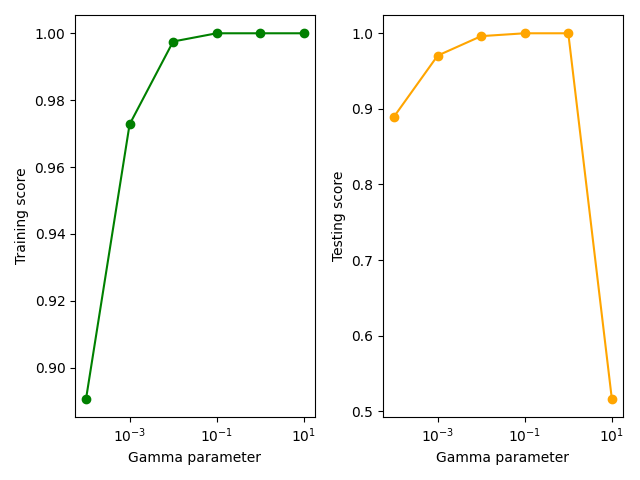

In [52]:
# let's visualize the relationship between gamma and the previous scores
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(gamma, trs, 'o-', color ='green')
ax2.plot(gamma, tes, 'o-', color ='orange')

ax1.set_xlabel('Gamma parameter')
ax1.set_ylabel('Training score')
ax2.set_xlabel('Gamma parameter')
ax2.set_ylabel('Testing score')
ax1.set_xscale('log')
ax2.set_xscale('log')

plt.tight_layout()
plt.show()

We could say that values for gamma paramater as 10E-4 and 10E-3 generate underfitting models, values as large as 10E-1 lead to overfitting model, and a value as 10E-2 could be a good candidate for good generalization